### Import

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Fonts

In [3]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Load Data

In [4]:
data = pd.read_csv('../../data/healthcare_cost/insurance.csv')
columns = data.columns
x_orig = data.iloc[:,0].values
y_orig = data.iloc[:,-1].values

### Clean Dataset for the univariate example

In [5]:
ind0 = np.where(y_orig > 17000)[0]
ind1 = np.where(x_orig < 46)[0]
ind2 = np.where(y_orig > 10000)[0]
ind3 = np.intersect1d(ind1,ind2)
ind4 = np.union1d(ind3,ind0)
ind5 = range(x_orig.shape[0])
ind5 = np.setdiff1d(ind5,ind4)
x_orig = x_orig[ind5].astype('float')
y_orig = y_orig[ind5].astype('float')

### Random Sample

In [6]:
np.random.seed(200)
idx = np.random.randint(0,x_orig.shape[0],20)
x = x_orig[idx]
y = y_orig[idx] / 1000.0

### Step 1: Compute the means of x and y
The first we need to compute are the means of our input (x) and output (y) variables

In [7]:
x_mean = np.sum(x) / len(x)
y_mean = np.sum(y) / len(y)

### Step 2: Compute the sum of squares for x and y: <br>

$\sum (x-\bar{x})^2$<br><br>
$\sum (y-\bar{y})^2$<br>

With the means computed in step 1, we can compute the sum_of_squares for both x and y. The sum of squares is squared difference of each data point and the mean across data point, summed across all data points. It is the precursor of variance and the standard deviation, and reflects how much our data is spread around the mean. 

In [8]:
x_sum_of_squares = np.sum((x - x_mean)**2)
y_sum_of_squares = np.sum((y - y_mean)**2)

### Step 3: Compute the coviarance<br>
$\sum {(x-\bar{x})(y-\bar{y})}$<br><br>
Similar to Step 2, but now we look how much one variable (e.g. x) moves in accordance with another (e.g.y). Both x and y have a mean. For each data point xi and yi we compute the difference between that datapoint and its mean. If both xi and yi are larger than their respective means, the resulting product will be positive. If both are smaller, than their respective means, the resulting product will still be positive (multiplying two negatives numbers results in a positive number). Should they fall on opposing sides of their means, the resulting value will be negative. By summing all these values together, we thus tally how often and how much two linked data point xi and yi move in relationship to their respective means. The more they 'move' in unison, the more positive values we obtain across data points. And the further they move (how much they both differ from their mean) scales these positive values. If the points show no consistent pattern of moving in unision, the resulting sum will be close to zero. Should x and y move in unison and in the same direction, the resulting sum will be positive, should they move consistently in opposite direction, the resulting sum will be negative. Therefore, this sum of 

In [9]:
xy_sum_of_squares = np.sum(((x-x_mean)*(y-y_mean)))

### Step 3: Compute the slope a

In [10]:
a = xy_sum_of_squares / x_sum_of_squares

### Step 4: Compute the intercept/bias/offset b

In [13]:
b = y_mean - x_mean*a
y_pred = x*a + b
y_mean = np.mean(y)
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
SSE = np.sum((y - y_pred)**2)
rsquared = SSR/SST


### Plot Result

NameError: name 'x0' is not defined

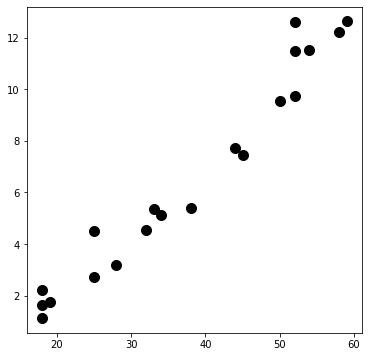

In [12]:
plt.figure(figsize=(6,6));
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.plot([x0,x1],[y0,y1],'k',zorder=100);
plt.plot([x0,x1],[y_mean,y_mean],'k:',zorder=100);
for idx in range(len(x)):
    plt.plot([x[idx],x[idx]],[y[idx],y_pred[idx]],'r--') #SS Error
    plt.plot([x[idx],x[idx]],[y_pred[idx],y_mean],'g--') #SS Regression
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_mean,s=25,color='k',zorder=1000)
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.ylabel('medical expenses (dollars x 1000)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.text(75,12,"SST = " + str(np.round(SST,2)),fontsize=22,**csfont);
plt.text(75,10,"SSR = " + str(np.round(SSR,2)),fontsize=22,**csfont);
plt.text(75,8,"SSE = " + str(np.round(SSE,2)),fontsize=22,**csfont);
plt.text(75,6,"r-squared = " + str(np.round(rsquared,2)),fontsize=22,**csfont);
plt.text(75,4,"a = " + str(np.round(a,2)),fontsize=22,**csfont);
plt.text(75,2,"b = " + str(np.round(b,2)),fontsize=22,**csfont);
plt.plot([45,50],[2.25,2.25],'r--')
plt.plot([45,50],[3.25,3.25],'g--')
plt.text(51.5,3.05,"= SSE",color='k',fontsize=18,**csfont);
plt.text(51.5,2.05,"= SSR",color='k',fontsize=18,**csfont);
plt.axis((10,70,0,15));
plt.savefig('../../assets/figures/014/statistical_approach_medical_expenses.png', dpi=300,bbox_inches="tight")